# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Import Functions

In [33]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

In [34]:
filepath=r'dataset/2020-Apr.csv'
file_tag = 'dataset/2020-Apr.csv'

# Load File

### method 1 - random sample

In [29]:
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath, parse_dates=['event_time'])


# Display the first 100 rows of the sample
print(df['event_type'].value_counts(normalize=True))

df.head(20)

event_type
view        0.923810
cart        0.057143
purchase    0.019048
Name: proportion, dtype: float64


,event_type,brand,price,category_code_lvl_1,conversion,category_code_lvl_2,category_code_lvl_3,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
66559,cart,oppo,277.74,construction,not_purchase,construction/tools,construction/tools/light,5,weekday,Thursday,30,12,12,afternoon
21362,view,NaN,86.21,apparel,not_purchase,apparel/shoes,apparel/shoes/sandals,2,weekend,Sunday,12,7,11,morning
1199,cart,ausini,18.76,furniture,not_purchase,furniture/living_room,furniture/living_room/chair,1,weekend,Saturday,4,7,38,morning
66098,view,chicco,282.89,apparel,not_purchase,apparel/shoes,apparel/shoes/keds,1,weekday,Friday,3,12,59,afternoon
67900,view,niio,34.75,appliances,not_purchase,appliances/kitchen,appliances/kitchen/mixer,4,weekend,Sunday,26,19,24,night
39877,view,gorenje,25.71,electronics,not_purchase,electronics/camera,electronics/camera/photo,2,weekday,Wednesday,8,12,42,afternoon
32761,view,NaN,54.31,NaN,not_purchase,NaN,NaN,4,weekday,Friday,24,15,26,afternoon
57668,view,asel,77.20,appliances,not_purchase,appliances/kitchen,appliances/kitchen/oven,4,weekday,Wednesday,22,7,40,morning
48709,view,beko,239.11,appliances,not_purchase,appliances/kitchen,appliances/kitchen/washer,1,weekend,Sunday,5,8,6,morning
6787,view,xiaomi,28.05,furniture,not_purchase,furniture/kitchen,furniture/kitchen/chair,2,weekday,Monday,13,2,28,night


### >> method 1.1 - random sample with undersample of the negative class (remove 30000 rows) [BEING USED]

In [35]:
import pandas as pd

# Define a flag for test data
test_data = True  # Altere para False se quiser carregar todo o dataset

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")
    df = df.sample(frac=0.0015, replace=False)
else:
    df = pd.read_csv(filepath, parse_dates=['event_time'])

# Exibir a contagem de classes antes do undersampling
print("Distribuição original:")
print(df['event_type'].value_counts(normalize=True))

# Separar as classes
df_not_purchase = df[df['event_type'] != 'purchase']
df_purchase = df[df['event_type'] == 'purchase']

# Verificar quantas linhas há na classe not_purchase
num_not_purchase = len(df_not_purchase)

# Definir o número de linhas a serem removidas
rows_to_remove = 30000

# Verificar se há linhas suficientes para remover
if num_not_purchase > rows_to_remove:
    # Remover 30.000 linhas da classe not_purchase
    df_not_purchase_downsampled = df_not_purchase.sample(n=num_not_purchase - rows_to_remove, random_state=42)
else:
    print(f"A classe 'not_purchase' só contém {num_not_purchase} linhas. Usando todas as linhas.")
    df_not_purchase_downsampled = df_not_purchase.copy()  # Manter todas as linhas

# Combinar a classe downsampled com a classe purchase
df_balanced = pd.concat([df_not_purchase_downsampled, df_purchase])

# Embaralhar o dataset combinado
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição de classes
print("Distribuição após undersampling:")
print(df['event_type'].value_counts(normalize=True))

# Exibir as primeiras 20 linhas do dataset equilibrado
print(df.head(20))
df.info



Distribuição original:
event_type
view        0.936847
cart        0.048056
purchase    0.015098
Name: proportion, dtype: float64
Distribuição após undersampling:
event_type
view        0.930242
cart        0.048180
purchase    0.021579
Name: proportion, dtype: float64
                 event_time event_type  product_id          category_id  \
0   2020-04-02 07:06:34 UTC       view    10300129  2232732104888681081   
1   2020-04-18 14:31:12 UTC       view   100119349  2232732093077520756   
2   2020-04-12 10:04:49 UTC       view    47500019  2053013561554240247   
3   2020-04-08 05:38:35 UTC       view   100174793  2053013555782877609   
4   2020-04-25 20:31:45 UTC       view     7001735  2232732079009824823   
5   2020-04-15 15:34:27 UTC       view    15902698  2053013566142809077   
6   2020-04-26 03:59:09 UTC       view     1005097  2232732093077520756   
7   2020-04-28 03:14:19 UTC       view   100137115  2232732066611463064   
8   2020-04-30 08:46:27 UTC       view   100086235  223

<bound method DataFrame.info of                     event_time event_type  product_id          category_id  \
0      2020-04-02 07:06:34 UTC       view    10300129  2232732104888681081   
1      2020-04-18 14:31:12 UTC       view   100119349  2232732093077520756   
2      2020-04-12 10:04:49 UTC       view    47500019  2053013561554240247   
3      2020-04-08 05:38:35 UTC       view   100174793  2053013555782877609   
4      2020-04-25 20:31:45 UTC       view     7001735  2232732079009824823   
...                        ...        ...         ...                  ...   
69879  2020-04-25 08:22:43 UTC       view   100101194  2232732088413454589   
69880  2020-04-29 13:48:47 UTC       view    12715811  2053013553199186187   
69881  2020-04-10 06:38:23 UTC       view    12500851  2232732091131363646   
69882  2020-04-17 05:12:12 UTC       view    13200134  2232732061804790604   
69883  2020-04-30 09:55:24 UTC       view   100170502  2055156924407612189   

                   category_cod

In [37]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-02 07:06:34 UTC,view,10300129,2232732104888681081,apparel.scarf,chicco,14.13,525254962,f71dc924-d5f3-4e21-906b-a492fe8476c9
1,2020-04-18 14:31:12 UTC,view,100119349,2232732093077520756,construction.tools.light,samsung,1280.32,564776771,20e5e22f-1c18-41af-94e1-c3da9a01a3f7
2,2020-04-12 10:04:49 UTC,view,47500019,2053013561554240247,electronics.clocks,puckator,20.59,514083451,0c4b4c5e-1ed0-49eb-9882-134f5e70c6f5
3,2020-04-08 05:38:35 UTC,view,100174793,2053013555782877609,sport.bicycle,adidas,82.34,638156155,01663f5b-958c-40fb-9c31-8c29ee897952
4,2020-04-25 20:31:45 UTC,view,7001735,2232732079009824823,kids.skates,wingoffly,144.12,646927025,b56c7ad3-dbb8-4637-ae2b-943f703c15fc


### method 2 - random sample from each day of the dataset

In [50]:
import pandas as pd

# Assuming your date column is 'event_time' and the target is 'event_type'
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    # Converting the time column to datetime, if necessary
    df['event_time'] = pd.to_datetime(df['event_time'])

    # Total number of rows you want in the final sample (1% of the total)
    total_samples = int(len(df) * 0.001)  # For example, 66,000 if the dataset has 66 million rows

    # Total count of rows per day
    daily_counts = df.groupby(df['event_time'].dt.date)['event_time'].count()

    # Function to perform balanced sampling per day
    def sample_per_day(group, frac, target_col='event_type'):
        # Split the group into 'purchase' and 'not purchase'
        purchase = group[group[target_col] == 'purchase']
        not_purchase = group[group[target_col] != 'purchase']

        # Calculate the number of samples based on the desired fraction per day
        total_samples_per_day = int(len(group) * frac)
        num_not_purchase = int(total_samples_per_day * 0.9)  # 90% of not purchases
        num_purchase = total_samples_per_day - num_not_purchase  # 10% of purchases

        # Sample each group
        sampled_not_purchase = not_purchase.sample(n=min(num_not_purchase, len(not_purchase)), replace=False)
        sampled_purchase = purchase.sample(n=min(num_purchase, len(purchase)), replace=False)

        # Return the combination of the two samples
        return pd.concat([sampled_not_purchase, sampled_purchase])

    # Determine the sampling fraction per day (based on the proportion of total desired samples)
    frac_per_day = total_samples / len(df)  # 1% of the total in the end

    # Apply the sampling function per day
    df = df.groupby(df['event_time'].dt.date).apply(sample_per_day, frac=frac_per_day).reset_index(drop=True)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath, parse_dates=['event_time'])

# Display the first 100 rows of the sample
print(df['event_type'].value_counts(normalize=True))
print(df.head(20))




event_type
view        0.861043
purchase    0.094341
cart        0.044615
Name: proportion, dtype: float64
                  event_time event_type  product_id          category_id  \
0  2020-04-01 09:38:45+00:00       view     1003316  2232732093077520756   
1  2020-04-01 15:00:06+00:00       view    15500102  2232732108319621820   
2  2020-04-01 12:01:58+00:00       view     1004856  2232732093077520756   
3  2020-04-01 08:14:06+00:00       view    22700592  2232732091643068746   
4  2020-04-01 07:38:10+00:00       view     1307352  2053013554658804075   
5  2020-04-01 14:40:30+00:00       view     1005160  2232732093077520756   
6  2020-04-01 14:25:33+00:00       view    28708366  2232732074815521775   
7  2020-04-01 06:35:20+00:00       view     4800898  2232732079706079299   
8  2020-04-01 13:33:05+00:00       view   100068493  2232732093077520756   
9  2020-04-01 14:12:01+00:00       cart     1004409  2232732093077520756   
10 2020-04-01 13:52:44+00:00       view     1801806  2232

### method 3 - joao

In [74]:
# Define a flag for test data
test_data = False

# Define a function to sample a fraction from each group
def sample_per_day(group, fraction=0.001):
    return group.sample(frac=fraction)

# Check if test data is enabled
if test_data:
    df = pd.read_csv(filepath)
    df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

    # Apply the sampling to each group (grouped by event date) with 1% sample
    df = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)


else:
    df = pd.read_csv(filepath)

    df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

    # Apply the sampling to each group (grouped by event date) with 10% sample
    df = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, 0.001)).reset_index(drop=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66591 entries, 0 to 66590
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   event_time     66591 non-null  datetime64[ns, UTC]
 1   event_type     66591 non-null  object             
 2   product_id     66591 non-null  int64              
 3   category_id    66591 non-null  int64              
 4   category_code  59845 non-null  object             
 5   brand          57702 non-null  object             
 6   price          66591 non-null  float64            
 7   user_id        66591 non-null  int64              
 8   user_session   66591 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 4.6+ MB


In [75]:

df['conversion'] = df['event_type'].apply(lambda x: 'purchase' if x == 'purchase' else 'not_purchase')

In [76]:
target = "conversion"

values = df[target].value_counts(normalize=True) 
print(values)

conversion
not_purchase    0.985794
purchase        0.014206
Name: proportion, dtype: float64


#### Sampling

In [77]:
# Separate the majority (0) and minority (1) classes
df_majority = df[df['conversion'] == 'not_purchase']
df_minority = df[df['conversion'] == 'purchase']

# Calculate the number of minority rows needed to make a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Downsample the minority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Combine the majority class with the downsampled minority class
df_imbalanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the combined dataset
df = df_imbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution to verify the 90/10 split
print(df['conversion'].value_counts(normalize=True) * 100)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [78]:
# Separate the majority (0) and minority (1) classes
df_majority = df[df['conversion'] == 'not_purchase']
df_minority = df[df['conversion'] == 'purchase']

# Calculate the number of minority rows needed to make a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Ensure that we do not request more samples than available in the minority class
desired_minority_count = min(desired_minority_count, len(df_minority))

# Downsample the minority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Combine the majority class with the downsampled minority class
df_imbalanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the combined dataset
df = df_imbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution to verify the 90/10 split
print(df['conversion'].value_counts(normalize=True) * 100)


conversion
not_purchase    98.579388
purchase         1.420612
Name: proportion, dtype: float64


In [87]:
# Define the fraction for sampling (1% of total data)
sample_fraction = 0.01

# Step 1: Ensure 'event_time' is in datetime format
df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

# Step 2: Sample 1% of data per day to ensure all days are represented
def sample_per_day(group, sample_fraction=0.001):
    return group.sample(frac=sample_fraction, random_state=42)

df_sampled = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, sample_fraction)).reset_index(drop=True)

# Step 3: Separate the majority (not_purchase) and minority (purchase) classes
df_majority = df_sampled[df_sampled['conversion'] == 'not_purchase']
df_minority = df_sampled[df_sampled['conversion'] == 'purchase']

# Step 4: Calculate the number of minority rows needed to achieve a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Step 5: Ensure we do not request more samples than available in the minority class
desired_minority_count = min(desired_minority_count, len(df_minority))

# Step 6: Downsample the majority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Step 7: Combine the majority class with the downsampled minority class
df_balanced = pd.concat([df_majority, df_minority_downsampled])

# Step 8: Shuffle the combined dataset
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(df['conversion'].value_counts(normalize=True) * 100)


conversion
not_purchase    98.353293
purchase         1.646707
Name: proportion, dtype: float64


## Add columns based on dataset col

#### Data granularity

##### Split category_code column

In [38]:

# Create new columns based on the column category_based
df['category_code_lvl_1'] = df['category_code'].str.split(".").str[0] #Obter o 1º nivel do category code e criar nova coluna
df['category_code_lvl_2'] = df['category_code'].str.split(".").str[1] #Obter o 2º nivel do category code e criar nova coluna
df['category_code_lvl_3'] = df['category_code'].str.split(".").str[2] #Obter o 3º nivel do category code e criar nova coluna

#create column target based on the event_type column
#when event_type=purchase => purchase
#     event_type != purchase => not_purchase 

df['conversion'] = 'not_purchase'  # Definindo valor padrão
df.loc[df['event_type']=='purchase', 'conversion'] = 'purchase'

df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion
0,2020-04-02 07:06:34 UTC,view,10300129,2232732104888681081,apparel.scarf,chicco,14.13,525254962,f71dc924-d5f3-4e21-906b-a492fe8476c9,apparel,scarf,NaN,not_purchase
1,2020-04-18 14:31:12 UTC,view,100119349,2232732093077520756,construction.tools.light,samsung,1280.32,564776771,20e5e22f-1c18-41af-94e1-c3da9a01a3f7,construction,tools,light,not_purchase
2,2020-04-12 10:04:49 UTC,view,47500019,2053013561554240247,electronics.clocks,puckator,20.59,514083451,0c4b4c5e-1ed0-49eb-9882-134f5e70c6f5,electronics,clocks,NaN,not_purchase
3,2020-04-08 05:38:35 UTC,view,100174793,2053013555782877609,sport.bicycle,adidas,82.34,638156155,01663f5b-958c-40fb-9c31-8c29ee897952,sport,bicycle,NaN,not_purchase
4,2020-04-25 20:31:45 UTC,view,7001735,2232732079009824823,kids.skates,wingoffly,144.12,646927025,b56c7ad3-dbb8-4637-ae2b-943f703c15fc,kids,skates,NaN,not_purchase
5,2020-04-15 15:34:27 UTC,view,15902698,2053013566142809077,construction.tools.generator,kukmara,58.27,637538119,d5278fad-6c3b-4299-ba87-63fa529953a3,construction,tools,generator,not_purchase
6,2020-04-26 03:59:09 UTC,view,1005097,2232732093077520756,construction.tools.light,tp-link,123.27,512789198,389c3154-31b9-45ef-94f4-524f950d0297,construction,tools,light,not_purchase
7,2020-04-28 03:14:19 UTC,view,100137115,2232732066611463064,NaN,carbon,728.72,547337863,164e5ade-5b5b-4bc7-a207-d97b8d00aafd,NaN,NaN,NaN,not_purchase
8,2020-04-30 08:46:27 UTC,view,100086235,2232732093077520756,construction.tools.light,samsung,106.04,646662457,d688fa8c-41a3-4918-88b9-ba0b1e8c1706,construction,tools,light,not_purchase
9,2020-04-03 15:38:01 UTC,cart,12201719,2053013553325015316,appliances.kitchen.toster,torrent,139.98,513650846,e2caf244-71ac-4104-ae14-8e50c8476a7a,appliances,kitchen,toster,not_purchase


### Convert category_code_level_2 and category_code_level_3 into funnel pages.
- fill ategory_code_level_3 with values from category_code_level_2

This is needed because some product categories don't have category_code_lvl

In [41]:
# Atualizar a coluna category_code_lvl_2_new, preservando os valores NaN
df['category_code_lvl_2_new'] = df['category_code_lvl_2'].where(df['category_code_lvl_2'].isna(), df['category_code_lvl_1'] + "/" + df['category_code_lvl_2'])

# Primeiro, criar a coluna category_code_lvl_3_new com a concatenação de category_code_lvl_2 e category_code_lvl_3
df['category_code_lvl_3_new'] = df['category_code_lvl_2_new'] + "/" + df['category_code_lvl_3']

# Em seguida, preencher os NaN da coluna category_code_lvl_3_new com o valor já concatenado de category_code_lvl_2
df['category_code_lvl_3_new'] = df['category_code_lvl_3_new'].fillna(df['category_code_lvl_2_new'])

# Verificar as primeiras linhas do DataFrame
df.head(10)



,event_time,event_type,product_id,category_id,category_code,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,user_id,user_session,conversion,category_code_lvl_2_new,category_code_lvl_3_new
0,2020-04-02 07:06:34 UTC,view,10300129,2232732104888681081,apparel.scarf,apparel,scarf,NaN,chicco,14.13,525254962,f71dc924-d5f3-4e21-906b-a492fe8476c9,not_purchase,apparel/scarf,apparel/scarf
1,2020-04-18 14:31:12 UTC,view,100119349,2232732093077520756,construction.tools.light,construction,tools,light,samsung,1280.32,564776771,20e5e22f-1c18-41af-94e1-c3da9a01a3f7,not_purchase,construction/tools,construction/tools/light
2,2020-04-12 10:04:49 UTC,view,47500019,2053013561554240247,electronics.clocks,electronics,clocks,NaN,puckator,20.59,514083451,0c4b4c5e-1ed0-49eb-9882-134f5e70c6f5,not_purchase,electronics/clocks,electronics/clocks
3,2020-04-08 05:38:35 UTC,view,100174793,2053013555782877609,sport.bicycle,sport,bicycle,NaN,adidas,82.34,638156155,01663f5b-958c-40fb-9c31-8c29ee897952,not_purchase,sport/bicycle,sport/bicycle
4,2020-04-25 20:31:45 UTC,view,7001735,2232732079009824823,kids.skates,kids,skates,NaN,wingoffly,144.12,646927025,b56c7ad3-dbb8-4637-ae2b-943f703c15fc,not_purchase,kids/skates,kids/skates
5,2020-04-15 15:34:27 UTC,view,15902698,2053013566142809077,construction.tools.generator,construction,tools,generator,kukmara,58.27,637538119,d5278fad-6c3b-4299-ba87-63fa529953a3,not_purchase,construction/tools,construction/tools/generator
6,2020-04-26 03:59:09 UTC,view,1005097,2232732093077520756,construction.tools.light,construction,tools,light,tp-link,123.27,512789198,389c3154-31b9-45ef-94f4-524f950d0297,not_purchase,construction/tools,construction/tools/light
7,2020-04-28 03:14:19 UTC,view,100137115,2232732066611463064,NaN,NaN,NaN,NaN,carbon,728.72,547337863,164e5ade-5b5b-4bc7-a207-d97b8d00aafd,not_purchase,NaN,NaN
8,2020-04-30 08:46:27 UTC,view,100086235,2232732093077520756,construction.tools.light,construction,tools,light,samsung,106.04,646662457,d688fa8c-41a3-4918-88b9-ba0b1e8c1706,not_purchase,construction/tools,construction/tools/light
9,2020-04-03 15:38:01 UTC,cart,12201719,2053013553325015316,appliances.kitchen.toster,appliances,kitchen,toster,torrent,139.98,513650846,e2caf244-71ac-4104-ae14-8e50c8476a7a,not_purchase,appliances/kitchen,appliances/kitchen/toster


In [42]:
#drop columns
# Remover as colunas temporárias (category_code_lvl_2_new e category_code_lvl_3_new se não precisar mais delas)
df.drop(columns=['category_code_lvl_2', 'category_code_lvl_3'], inplace=True)

df.rename(columns={
    'category_code_lvl_2_new': 'category_code_lvl_2', 
    'category_code_lvl_3_new': 'category_code_lvl_3'
}, inplace=True)

# Verificar as primeiras linhas do DataFrame
df.head(10)


,event_time,event_type,product_id,category_id,category_code,category_code_lvl_1,brand,price,user_id,user_session,conversion,category_code_lvl_2,category_code_lvl_3
0,2020-04-02 07:06:34 UTC,view,10300129,2232732104888681081,apparel.scarf,apparel,chicco,14.13,525254962,f71dc924-d5f3-4e21-906b-a492fe8476c9,not_purchase,apparel/scarf,apparel/scarf
1,2020-04-18 14:31:12 UTC,view,100119349,2232732093077520756,construction.tools.light,construction,samsung,1280.32,564776771,20e5e22f-1c18-41af-94e1-c3da9a01a3f7,not_purchase,construction/tools,construction/tools/light
2,2020-04-12 10:04:49 UTC,view,47500019,2053013561554240247,electronics.clocks,electronics,puckator,20.59,514083451,0c4b4c5e-1ed0-49eb-9882-134f5e70c6f5,not_purchase,electronics/clocks,electronics/clocks
3,2020-04-08 05:38:35 UTC,view,100174793,2053013555782877609,sport.bicycle,sport,adidas,82.34,638156155,01663f5b-958c-40fb-9c31-8c29ee897952,not_purchase,sport/bicycle,sport/bicycle
4,2020-04-25 20:31:45 UTC,view,7001735,2232732079009824823,kids.skates,kids,wingoffly,144.12,646927025,b56c7ad3-dbb8-4637-ae2b-943f703c15fc,not_purchase,kids/skates,kids/skates
5,2020-04-15 15:34:27 UTC,view,15902698,2053013566142809077,construction.tools.generator,construction,kukmara,58.27,637538119,d5278fad-6c3b-4299-ba87-63fa529953a3,not_purchase,construction/tools,construction/tools/generator
6,2020-04-26 03:59:09 UTC,view,1005097,2232732093077520756,construction.tools.light,construction,tp-link,123.27,512789198,389c3154-31b9-45ef-94f4-524f950d0297,not_purchase,construction/tools,construction/tools/light
7,2020-04-28 03:14:19 UTC,view,100137115,2232732066611463064,NaN,NaN,carbon,728.72,547337863,164e5ade-5b5b-4bc7-a207-d97b8d00aafd,not_purchase,NaN,NaN
8,2020-04-30 08:46:27 UTC,view,100086235,2232732093077520756,construction.tools.light,construction,samsung,106.04,646662457,d688fa8c-41a3-4918-88b9-ba0b1e8c1706,not_purchase,construction/tools,construction/tools/light
9,2020-04-03 15:38:01 UTC,cart,12201719,2053013553325015316,appliances.kitchen.toster,appliances,torrent,139.98,513650846,e2caf244-71ac-4104-ae14-8e50c8476a7a,not_purchase,appliances/kitchen,appliances/kitchen/toster


In [43]:
# Definir a nova ordem das colunas
new_column_order = [
    'event_time', 
    'event_type', 
    'product_id', 
    'category_id', 
    'category_code', 
    'category_code_lvl_1',  # Mover esta coluna para perto dos níveis 2 e 3
    'category_code_lvl_2', 
    'category_code_lvl_3', 
    'brand', 
    'price', 
    'user_id', 
    'user_session', 
    'conversion'
]

# Reorganizar as colunas do DataFrame
df = df[new_column_order]

# Verificar as primeiras linhas do DataFrame com a nova ordem de colunas
df.head(10)

,event_time,event_type,product_id,category_id,category_code,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,user_id,user_session,conversion
0,2020-04-02 07:06:34 UTC,view,10300129,2232732104888681081,apparel.scarf,apparel,apparel/scarf,apparel/scarf,chicco,14.13,525254962,f71dc924-d5f3-4e21-906b-a492fe8476c9,not_purchase
1,2020-04-18 14:31:12 UTC,view,100119349,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,samsung,1280.32,564776771,20e5e22f-1c18-41af-94e1-c3da9a01a3f7,not_purchase
2,2020-04-12 10:04:49 UTC,view,47500019,2053013561554240247,electronics.clocks,electronics,electronics/clocks,electronics/clocks,puckator,20.59,514083451,0c4b4c5e-1ed0-49eb-9882-134f5e70c6f5,not_purchase
3,2020-04-08 05:38:35 UTC,view,100174793,2053013555782877609,sport.bicycle,sport,sport/bicycle,sport/bicycle,adidas,82.34,638156155,01663f5b-958c-40fb-9c31-8c29ee897952,not_purchase
4,2020-04-25 20:31:45 UTC,view,7001735,2232732079009824823,kids.skates,kids,kids/skates,kids/skates,wingoffly,144.12,646927025,b56c7ad3-dbb8-4637-ae2b-943f703c15fc,not_purchase
5,2020-04-15 15:34:27 UTC,view,15902698,2053013566142809077,construction.tools.generator,construction,construction/tools,construction/tools/generator,kukmara,58.27,637538119,d5278fad-6c3b-4299-ba87-63fa529953a3,not_purchase
6,2020-04-26 03:59:09 UTC,view,1005097,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,tp-link,123.27,512789198,389c3154-31b9-45ef-94f4-524f950d0297,not_purchase
7,2020-04-28 03:14:19 UTC,view,100137115,2232732066611463064,NaN,NaN,NaN,NaN,carbon,728.72,547337863,164e5ade-5b5b-4bc7-a207-d97b8d00aafd,not_purchase
8,2020-04-30 08:46:27 UTC,view,100086235,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,samsung,106.04,646662457,d688fa8c-41a3-4918-88b9-ba0b1e8c1706,not_purchase
9,2020-04-03 15:38:01 UTC,cart,12201719,2053013553325015316,appliances.kitchen.toster,appliances,appliances/kitchen,appliances/kitchen/toster,torrent,139.98,513650846,e2caf244-71ac-4104-ae14-8e50c8476a7a,not_purchase


##### Split event_time column

In [44]:
# Split the event_time column to have more information and detail on the:
# - day_of_month
# - day_ok_week 
# - is_weekend
# - moment_of_day
# -hour
# - min
#As the dataset only as data from s sepecific month of 2020, we don't need to get the year, quarter and month.
#These attribute may influence the purchase of the users


# Converter a coluna 'event_time' para datetime
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)

# Create new columns based on date column 'event_time'

df['week_of_month'] = df['event_time'].apply(lambda x: (x.day - 1) // 7 + 1)
df['is_weekend'] = df['event_time'].dt.weekday.apply(lambda x: "weekend" if x >= 5 else "weekday") 

df['day_of_week'] = df['event_time'].dt.day_name()# Monday=0, Sunday=6
df['day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour
df['min'] = df['event_time'].dt.minute

#create function to get time of the day
def get_time_of_day(hour):
    if 6<= hour <12:
        return "morning"
    elif 12<= hour <=18:
        return "afternoon"
    else:
        return "night"

df['time_of_day']= df['hour'].apply(get_time_of_day)
    
df.head()


,event_time,event_type,product_id,category_id,category_code,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,user_id,user_session,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,2020-04-02 07:06:34+00:00,view,10300129,2232732104888681081,apparel.scarf,apparel,apparel/scarf,apparel/scarf,chicco,14.13,525254962,f71dc924-d5f3-4e21-906b-a492fe8476c9,not_purchase,1,weekday,Thursday,2,7,6,morning
1,2020-04-18 14:31:12+00:00,view,100119349,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,samsung,1280.32,564776771,20e5e22f-1c18-41af-94e1-c3da9a01a3f7,not_purchase,3,weekend,Saturday,18,14,31,afternoon
2,2020-04-12 10:04:49+00:00,view,47500019,2053013561554240247,electronics.clocks,electronics,electronics/clocks,electronics/clocks,puckator,20.59,514083451,0c4b4c5e-1ed0-49eb-9882-134f5e70c6f5,not_purchase,2,weekend,Sunday,12,10,4,morning
3,2020-04-08 05:38:35+00:00,view,100174793,2053013555782877609,sport.bicycle,sport,sport/bicycle,sport/bicycle,adidas,82.34,638156155,01663f5b-958c-40fb-9c31-8c29ee897952,not_purchase,2,weekday,Wednesday,8,5,38,night
4,2020-04-25 20:31:45+00:00,view,7001735,2232732079009824823,kids.skates,kids,kids/skates,kids/skates,wingoffly,144.12,646927025,b56c7ad3-dbb8-4637-ae2b-943f703c15fc,not_purchase,4,weekend,Saturday,25,20,31,night


In [45]:
df.dtypes

event_time             datetime64[ns, UTC]
event_type                          object
product_id                           int64
category_id                          int64
category_code                       object
category_code_lvl_1                 object
category_code_lvl_2                 object
category_code_lvl_3                 object
brand                               object
price                              float64
user_id                              int64
user_session                        object
conversion                          object
week_of_month                        int64
is_weekend                          object
day_of_week                         object
day                                  int32
hour                                 int32
min                                  int32
time_of_day                         object
dtype: object

## Remove columns with ids

In [46]:
#drop id columns that are not relevant for the prediction of the class

df = df.drop(columns=['event_time','product_id', 'category_id', 'category_code','user_session','user_id'])

df.head(10)

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,view,apparel,apparel/scarf,apparel/scarf,chicco,14.13,not_purchase,1,weekday,Thursday,2,7,6,morning
1,view,construction,construction/tools,construction/tools/light,samsung,1280.32,not_purchase,3,weekend,Saturday,18,14,31,afternoon
2,view,electronics,electronics/clocks,electronics/clocks,puckator,20.59,not_purchase,2,weekend,Sunday,12,10,4,morning
3,view,sport,sport/bicycle,sport/bicycle,adidas,82.34,not_purchase,2,weekday,Wednesday,8,5,38,night
4,view,kids,kids/skates,kids/skates,wingoffly,144.12,not_purchase,4,weekend,Saturday,25,20,31,night
5,view,construction,construction/tools,construction/tools/generator,kukmara,58.27,not_purchase,3,weekday,Wednesday,15,15,34,afternoon
6,view,construction,construction/tools,construction/tools/light,tp-link,123.27,not_purchase,4,weekend,Sunday,26,3,59,night
7,view,NaN,NaN,NaN,carbon,728.72,not_purchase,4,weekday,Tuesday,28,3,14,night
8,view,construction,construction/tools,construction/tools/light,samsung,106.04,not_purchase,5,weekday,Thursday,30,8,46,morning
9,cart,appliances,appliances/kitchen,appliances/kitchen/toster,torrent,139.98,not_purchase,1,weekday,Friday,3,15,38,afternoon


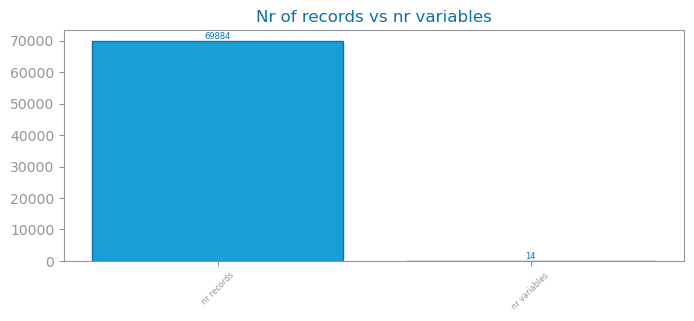

In [47]:
from matplotlib.pyplot import figure, savefig, show


figure(figsize=(8, 3)) #(largura,altura) 

values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}

#df_shape[0] - retorna o numero de linhas
#df_shape[1] - retorna o numero de colunas


plot_bar_chart(
    list(values.keys())\
    ,list(values.values())\
    ,title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

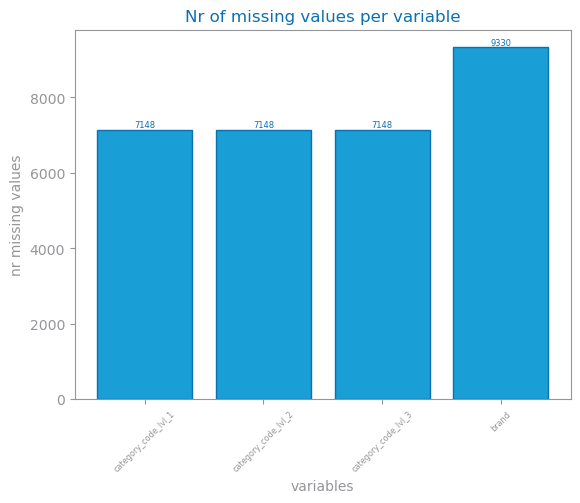

In [52]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

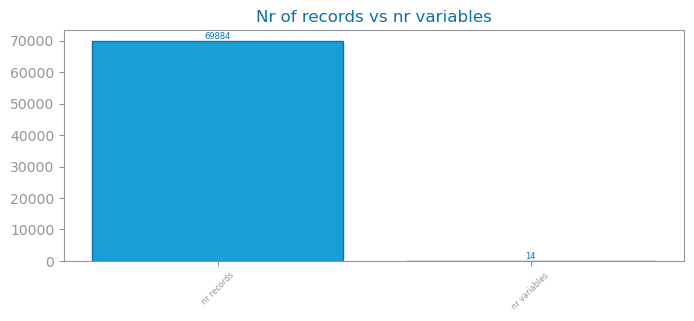

In [55]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(8, 3))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

# Save final df from pre_processing phase into a csv file
- We will use this dataset for the next phase - data profiling

In [53]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_pre_proc.csv'

# Salvar o DataFrame em CSV
df.to_csv(filepath, index=False)